<a href="https://colab.research.google.com/github/MattJCR/Algoritmo-Arboles-de-decision/blob/master/Algoritmo_%C3%81RBOLES_DECISI%C3%93N_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORITMOS DE APRENDIZAJE SUPERVISADO: ÁRBOLES DE DECISIÓN - WINE QUALITY**
Clasificación de la calidad del vino según alguno de sus parámetros (ph, densidad, sulfatos, alcohol, azúcar, etc.). El dataset contiene una serie de datos sobre unos vino y su calidad (de 0 a 10). Este problema es de clasificación puesto que consiste en clasificar el vino en concreto en su clase de calidad (valores discretos del cero al 10)

In [ ]:
#@title Importación de librerías
import pandas as pd
import urllib.request
import tempfile
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statistics
import warnings
warnings.filterwarnings('ignore')
# Descargar clase Preprocessing para el tratado del dataset
urllib.request.urlretrieve('https://raw.githubusercontent.com/MattJCR/Algoritmo-Arboles-de-decision/master/Preprocessing.py', 'Preprocessing.py')
from Preprocessing import CleanData as cd

In [ ]:
#@title Obtención del dataset

# URL del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/MattJCR/Algoritmo-Arboles-de-decision/master/dataset/WineQT.csv'

# Descargar el archivo CSV
response = urllib.request.urlopen(url)

# Crear un archivo temporal para guardar el archivo CSV descargado
temp = tempfile.NamedTemporaryFile()

# Escribir los datos descargados en el archivo temporal
temp.write(response.read())

# Mover el puntero al inicio del archivo
temp.seek(0)

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(temp)

# Cerrar el archivo temporal
temp.close()

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
#@title Mostrado de primeras lineas del dataset
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
#@title Mostrado de ultimas lineas del dataset
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [ ]:
#@title Obtener el resumen estadístico del DataFrame
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

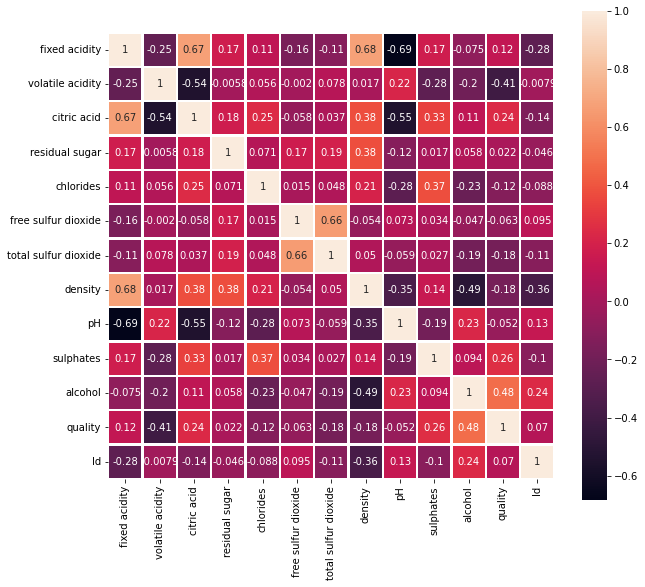

In [ ]:
#@title Mostrar un mapa de calor que indique la correlación entre variables
# Calcular la correlación entre las variables del DataFrame
corr = df.corr()

# Mostrar el mapa de calor de la correlación
plt.figure(figsize=(10, 9))
sns.heatmap(corr,square=True,annot=True,linewidths=1.5)
plt


## **Seleccionar las características a tener en cuenta en el estudio**
Para este estudio vamos a seleccionar las propiedades que tengan una relacion por encima de 0.5 y por debajo de -0.5 basandonos en el mapa de calor.

Por tanto vamos a eliminar las siguientes columnas:
* residual sugar
* chlorides
* sulphates
* Id

Vamos a mantener las siguientes columnas pese a no cumplir con la relación:
* alchohol (Mantenemos esta columna ya que es bastante proxima a 0.5 y -0.5)
* quality (Es la columna a predecir)

In [ ]:
#@title Eliminación de columnas innecesarias y preprocesamiento de datos

# Limpiado de datos
df = cd.clean(df)

# Borrado de columnas
df = df.drop('residual sugar',axis=1)
df = df.drop('chlorides',axis=1)
df = df.drop('sulphates',axis=1)
df = df.drop('id',axis=1)

df

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,ph,alcohol,quality
0,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,9.4,5
1,7.8,0.880,0.00,25.0,67.0,0.99680,3.20,9.8,5
2,7.8,0.760,0.04,15.0,54.0,0.99700,3.26,9.8,5
3,11.2,0.280,0.56,17.0,60.0,0.99800,3.16,9.8,6
4,7.4,0.700,0.00,11.0,34.0,0.99780,3.51,9.4,5
...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,29.0,40.0,0.99574,3.42,11.0,6
1139,6.8,0.620,0.08,28.0,38.0,0.99651,3.42,9.5,6
1140,6.2,0.600,0.08,32.0,44.0,0.99490,3.45,10.5,5
1141,5.9,0.550,0.10,39.0,51.0,0.99512,3.52,11.2,6


In [ ]:
#@title Separar datos entre datos de entrada y etiquetas (resultados)

# Obtenemos la columna quality
df_quality = df['quality']

# Eliminamos la columna quality del dataframe
df = df.drop('quality',axis=1)

In [ ]:
#@title Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)

x_train,x_test,y_train, y_test = train_test_split(df,df_quality,random_state=1,train_size=0.80)

# **Entrenamiento y predicción**

In [ ]:
#@title Importamos el modelo DecisionTreeClassifier
modelo_DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [ ]:
#@title Entrenamos el modelo DecisionTreeClassifier
modelo_DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
#@title Realizar una predicción con los datos de prueba
predict = modelo_DecisionTree.predict(x_test)
predict

array([6, 5, 7, 6, 5, 7, 5, 5, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 6,
       5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6,
       5, 6, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       5, 6, 5, 7, 6, 7, 5, 5, 5, 6, 5, 5, 6, 7, 5, 6, 5, 6, 5, 5, 5, 6,
       6, 5, 5, 5, 7, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6,
       5, 6, 7, 7, 5, 5, 6, 5, 5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5,
       5, 7, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 7, 5, 7, 5, 6, 5, 7, 5, 6,
       6, 6, 6, 7, 7, 6, 6, 7, 5, 5, 7, 5, 5, 7, 7, 5, 5, 5, 5, 6, 5, 5,
       6, 5, 5, 5, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 6, 5, 6, 7,
       5, 6, 5, 5, 5, 6, 6, 5, 7])

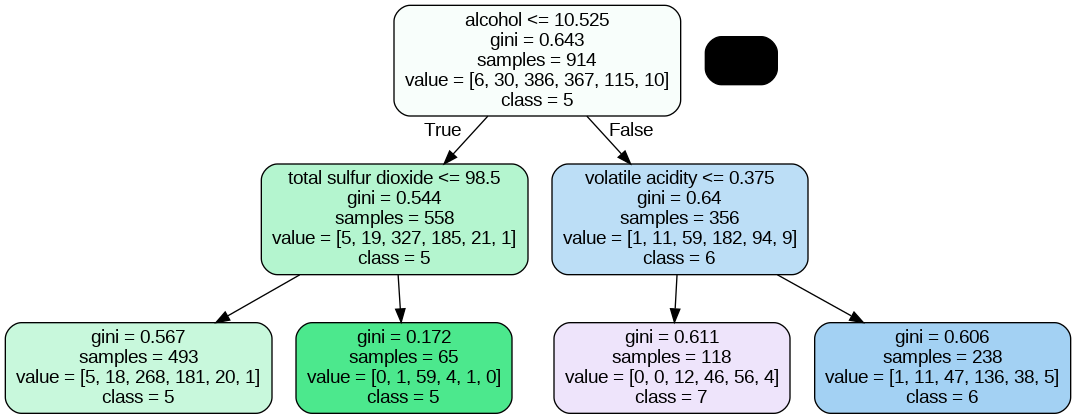

In [ ]:
#@title Mostrar el árbol de decisión resultante
import pydot
from IPython.display import Image
from sklearn import tree
from io import StringIO
dot_data = StringIO()

tree.export_graphviz(modelo_DecisionTree, 
                     out_file= dot_data,
                     class_names=modelo_DecisionTree.classes_.astype(str),
                     feature_names=x_train.columns,
                     rounded=True,
                     filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
#@title Mostrar la importancia de cada atributo en el árbol resultante
modelo_DecisionTree.feature_importances_

array([0.        , 0.13979822, 0.        , 0.        , 0.16092417,
       0.        , 0.        , 0.69927762])

# **Evaluación**

In [ ]:
#@title Mostrar el porcentaje de elementos correctamente clasificados
accuracy_score(y_test, predict)

0.5633187772925764

In [ ]:
#@title Mostrar la predicción realizada (imprimir la variable con la predicción)
example = pd.DataFrame({'volatile acidity':[.1], 'citric acid':[.7], 'fixed acidity':[1],
       'total sulfur dioxide':[9],'free sulfur dioxide':[11], 'density':[.66], 'ph':[2], 'alcohol':[14]})
modelo_DecisionTree.predict(example)[0]

6

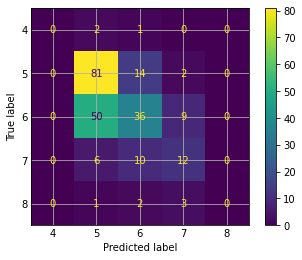

In [ ]:
#@title Representar gráficamente la clasificación obtenida (matriz de confusión)
ConfusionMatrixDisplay.from_predictions(y_test,predict)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

In [ ]:
#@title Mostrar el error cuadrático medio (mean_squared_error)
mean_squared_error(y_test, predict)

0.6157205240174672

In [ ]:
#@title Mostrar el error absoluto medio (mean_absolute_error)
mean_absolute_error(y_test, predict)

0.49344978165938863

# **Optimización de hiperparámetros**
Calcula la combinación de parámetros óptima (gini o entropy; valor de k). Para ello realiza ejecuciones con cada uno de los valores gini y entropy para los valores de k desde 1 a 15.

Cada ejecución anterior se deberá hacer usando validación cruzada (por ejemplo n_splits = 5). Con ello obtendremos una medida de bondad del modelo (accuracy_score o mean_absolute_error)), como lo ejecutaremos 5 veces, calcularemos la media de esas 5 ejecuciones.

In [ ]:
optimization_result = {'gini':[],'entropy':[]}
for k in range(1,15):
  modelo_DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=k)
  # Instanciar KFold con 5 divisiones y una semilla aleatoria fija
  kfold = KFold(n_splits=5)
  # Dividir los datos en conjuntos de entrenamiento y validación
  result = []
  for train_index, val_index in kfold.split(df):
    x_train, x_test = df.iloc[train_index], df.iloc[val_index]
    y_train, y_test = df_quality.iloc[train_index], df_quality.iloc[val_index]
        
    # Entrenar y evaluar el modelo con los conjuntos de entrenamiento y validación
    modelo_DecisionTree.fit(x_train, y_train)
    predict = modelo_DecisionTree.predict(x_test)
    score = accuracy_score(y_test, predict)
    #print(f'Score: {score:.2f}')
    result.append(score)
  optimization_result['gini'].append(statistics.mean(result))
for k in range(1,15):
  modelo_DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=k)
  # Instanciar KFold con 5 divisiones y una semilla aleatoria fija
  kfold = KFold(n_splits=5)
  # Dividir los datos en conjuntos de entrenamiento y validación
  result = []
  for train_index, val_index in kfold.split(df):
    x_train, x_test = df.iloc[train_index], df.iloc[val_index]
    y_train, y_test = df_quality.iloc[train_index], df_quality.iloc[val_index]
        
    # Entrenar y evaluar el modelo con los conjuntos de entrenamiento y validación
    modelo_DecisionTree.fit(x_train, y_train)
    predict = modelo_DecisionTree.predict(x_test)
    score = accuracy_score(y_test, predict)
    #print(f'Score: {score:.2f}')
    result.append(score)
  optimization_result['entropy'].append(statistics.mean(result))

In [ ]:
#@title Finalmente los parámetros elegidos serán los que den mejor media de esas medidas anteriormente nombradas.

# Obtener el índice del elemento mayor
uniform_max_index = max(enumerate(optimization_result['gini']), key=lambda x: x[1])[0]
distance_max_index = max(enumerate(optimization_result['entropy']), key=lambda x: x[1])[0]
print('gini[' + str(uniform_max_index) + ']:',optimization_result['gini'][uniform_max_index],', max_depth=' + str(uniform_max_index + 1))
print('entropy[' + str(distance_max_index) + ']:',optimization_result['entropy'][distance_max_index],', max_depth=' + str(distance_max_index + 1))

gini[3]: 0.5879069945606374 , max_depth=4
entropy[3]: 0.5564314716923313 , max_depth=4


In [ ]:
#@title Una vez obtenidos esos parámetros óptimos los aplicaremos al problema en cuestión y mostraremos los resultados.

# Instanciamos el modelo con los parametros óptimos
modelo_DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=4)

# Creamos los datos de entrenamiento
x_train,x_test,y_train, y_test = train_test_split(df,df_quality,random_state=1,train_size=0.75)

# Entrenamos el modelo KNN
modelo_DecisionTree.fit(x_train,y_train)

# Realizamos una predicción con los datos de prueba
predict = modelo_DecisionTree.predict(x_test)

# Obtenemos el porcentaje de elementos correctamente clasificados
score = accuracy_score(y_test, predict)

# Obtenemos el error cuadrático medio
squared_error = mean_squared_error(y_test, predict)

# Obtenemos Mostrar el error absoluto medio (mean_absolute_error)
absolute_error = mean_absolute_error(y_test, predict)

print(f'accuracy_score: {score:.2f}')
print(f'mean_squared_error: {squared_error:.2f}')
print(f'mean_absolute_error: {absolute_error:.2f}')

accuracy_score: 0.62
mean_squared_error: 0.50
mean_absolute_error: 0.42


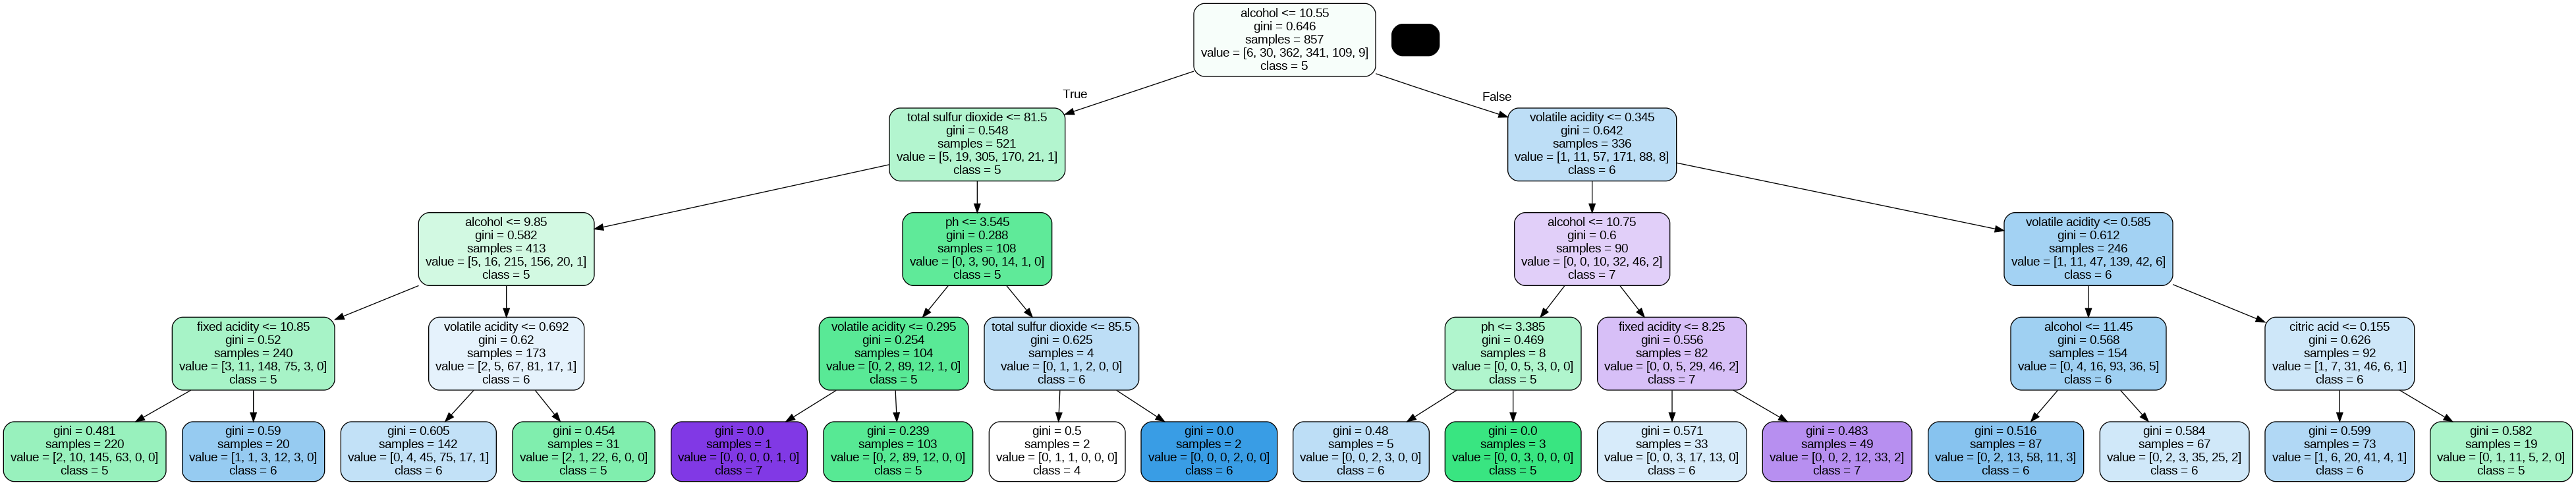

In [ ]:
#@title Mostrar el árbol de decisión resultante
import pydot
from IPython.display import Image
from sklearn import tree
from io import StringIO
dot_data = StringIO()

tree.export_graphviz(modelo_DecisionTree, 
                     out_file= dot_data,
                     class_names=modelo_DecisionTree.classes_.astype(str),
                     feature_names=x_train.columns,
                     rounded=True,
                     filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
#@title Mostrar la importancia de cada atributo en el árbol resultante
modelo_DecisionTree.feature_importances_

array([0.07971192, 0.20308579, 0.02220295, 0.        , 0.12119516,
       0.        , 0.0280345 , 0.54576968])

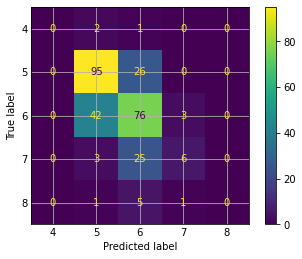

In [ ]:
#@title Representamos gráficamente la clasificación obtenida (matriz de confusión)

ConfusionMatrixDisplay.from_predictions(y_test,predict)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

# **Conclusiones**

En este estudio se ha analizado la clasificación de la calidad del vino utilizando el algoritmo de clasificación de ÁRBOLES DE DECISIÓN. Se ha usado un conjunto de datos que incluye información sobre vinos y su calidad evaluada en una escala de 0 a 10. Se ha limpiado y procesado el conjunto de datos utilizando una clase llamada Preprocessing.py, que permite eliminar filas con valores nulos, rellenar valores nulos con la media, eliminar columnas no deseadas, convertir el nombre de las columnas a minúsculas y convertir las columnas del DataFrame a los tipos adecuados (numérico, fecha o cadena de caracteres).

Se ha calculado la correlación entre las variables del DataFrame y se ha visualizado mediante un mapa de calor. A partir de este análisis, se han seleccionado las características que se han usado en el estudio en base a la correlación entre ellas, eliminando aquellas que no cumplen con una relación por encima de 0.5 y por debajo de -0.5. Los datos se han separado en datos de entrada y calidades y se han dividido en un conjunto de entrenamiento y un conjunto de prueba, utilizando un 80% y un 20% respectivamente.

Luego se ha realizado una optimización de hiperparámetros del modelo utilizando validación cruzada para encontrar la combinación óptima de parámetros. Se han probado dos opciones para el parámetro criterion ("gini" y "entropy") y se han evaluado distintos valores de k para cada opción. Los resultados se han guardado en un diccionario y se han calculado las medias de las ejecuciones para cada combinación de parámetros.

Finalmente, se han seleccionado los parámetros que han dado la mejor media de puntuación para el modelo (accuracy_score). Los parámetros elegidos son el valor de k (4) y criterion (gini), que han dado la mayor media (0.5879069945606374).

En base a los resultados obtenidos, se pueden hacer las siguientes conclusiones:

* La optimización de hiperparámetros es un proceso importante para mejorar el rendimiento de un modelo de aprendizaje automático.
* La validación cruzada es una técnica útil para evaluar el rendimiento de un modelo de manera robusta y precisa.
* La correlación entre las variables del DataFrame es un factor a tener en cuenta a la hora de seleccionar las características a utilizar en el estudio.

* En este caso, el parámetro criterion "gini" ha dado resultados ligeramente mejores que "entropy".